# ASSIGNMENT 2:

> Build a simple linear regression model for Salary_hike by performing EDA and do necessary transformations and select the best model.

> Dataset: https://drive.google.com/file/d/1hKXbqlB_eWnkQCdASY1dJCZlCnGlbz7Y/view

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Load the dataset
df = pd.read_csv('assignment2_dataset.csv')

# Display the head of the dataset
print(df.head())

C:\Users\Anish\AppData\Local\Temp\ipykernel_20768\3707697812.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


   Unnamed: 0       Unnamed: 1 Unnamed: 2
0         NaN  YearsExperience     Salary
1         0.0              1.1      39343
2         1.0              1.3      46205
3         2.0              1.5      37731
4         3.0                2      43525


In [2]:
print(df.tail())

    Unnamed: 0 Unnamed: 1 Unnamed: 2
26        25.0          9     105582
27        26.0        9.5     116969
28        27.0        9.6     112635
29        28.0       10.3     122391
30        29.0       10.5     121872


In [3]:
print(df)

    Unnamed: 0       Unnamed: 1 Unnamed: 2
0          NaN  YearsExperience     Salary
1          0.0              1.1      39343
2          1.0              1.3      46205
3          2.0              1.5      37731
4          3.0                2      43525
5          4.0              2.2      39891
6          5.0              2.9      56642
7          6.0                3      60150
8          7.0              3.2      54445
9          8.0              3.2      64445
10         9.0              3.7      57189
11        10.0              3.9      63218
12        11.0                4      55794
13        12.0                4      56957
14        13.0              4.1      57081
15        14.0              4.5      61111
16        15.0              4.9      67938
17        16.0              5.1      66029
18        17.0              5.3      83088
19        18.0              5.9      81363
20        19.0                6      93940
21        20.0              6.8      91738
22        2

In [4]:
df.columns = df.iloc[0]
df = df[1:]
df = df.rename(columns={'YearsExperience': 'YearsExperience', 'Salary': 'Salary'})
print(df.head())


0  NaN YearsExperience Salary
1  0.0             1.1  39343
2  1.0             1.3  46205
3  2.0             1.5  37731
4  3.0               2  43525
5  4.0             2.2  39891


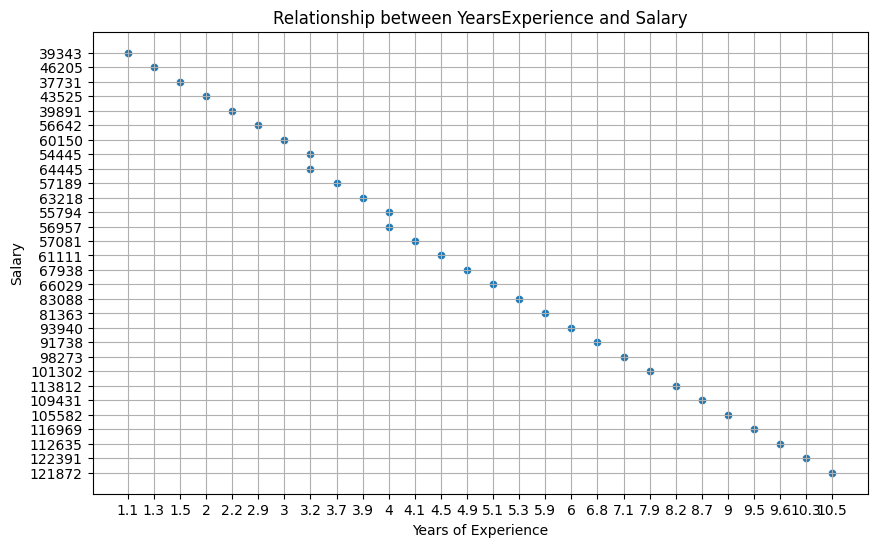

In [5]:
import seaborn as sns

# Plotting the relationship between YearsExperience and Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Relationship between YearsExperience and Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [6]:
#The scatter plot above shows the relationship between Years of Experience and Salary. It helps visualize the data points and the potential linear relationship between the two variables.

without scaling, without optimization

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting the data into X (predictor) and y (target)
X = df[['YearsExperience']]
y = df['Salary']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Building the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 6988.8090649421


With scaling, without optimization

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Splitting the data into X (predictor) and y (target)
X = df[['YearsExperience']]
y = df['Salary']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Calculating the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 6988.809064942103


Without scaling, with optimization

In [9]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler

# Splitting the data into X (predictor) and y (target)
X = df[['YearsExperience']]
y = df['Salary']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# # Feature scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Building the linear regression model with SGD optimizer
model = SGDRegressor(loss='squared_error',learning_rate='adaptive',max_iter=10000)

# Fitting the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating the RMSE
rmse = root_mean_squared_error(y_test, y_pred)

print('Root Mean Squared Error:', rmse)


Root Mean Squared Error: 6947.121316461714


In [10]:
import joblib
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [11]:
# Define the custom data (years of experience)
custom_data = [[20], [15], [10]]  # Example: Predicting for 20, 15, and 10 years of experience

# Assuming you have already scaled the custom data if necessary
custom_data_scaled = scaler.transform(custom_data)  # Assuming scaler is already defined

# Making predictions on the scaled custom data
predictions = model.predict(custom_data_scaled)

# Print the predicted salaries for the custom data
for years_exp, salary in zip(custom_data, predictions):
    print(f"Predicted Salary for {years_exp[0]} years of experience: {salary}")


Predicted Salary for 20 years of experience: 76831.199078641
Predicted Salary for 15 years of experience: 59711.13731429227
Predicted Salary for 10 years of experience: 42591.075549943555


## Model inference

In [12]:
# Load the saved model
loaded_model = joblib.load('linear_regression_model.pkl')

# Perform inference with new data
new_data = [[7], [25], [12]]  
new_data_scaled = scaler.transform(new_data)
predictions = loaded_model.predict(new_data_scaled)

print('Predictions:', predictions)

Predictions: [32319.03849133 93951.26084299 49439.10025568]
